In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [6]:
print('Training data shape:',X_train.shape)
print('Training labels shape:',Y_train.shape)
print('Test data shape:',X_test.shape)
print('Test labels shape:',Y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


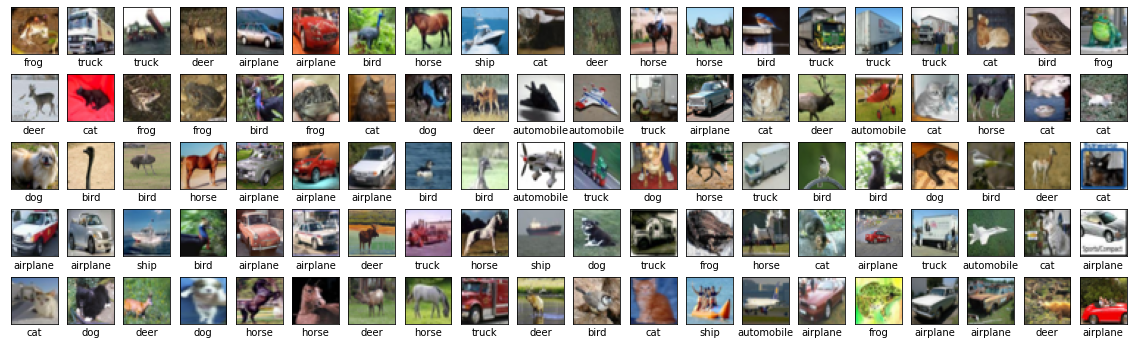

In [7]:
classes=['automobile','airplane',  'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

R = 5
C = 20
i = 0

plt.figure(figsize=(20,6))
for i in range (100):
        plt.subplot(R,C,i+1)
        plt.imshow(X_train[i])
       
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(classes[ Y_train[i][0] ])
        i += 1

In [8]:
X_train_reshaped = X_train.reshape(-1,32*32*3).astype('float32')/255
print(f"train img reshape{X_train_reshaped.shape}")
# print(X_train[0].shape)

train img reshape(50000, 3072)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=3072),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)



In [13]:
h = model.fit(x=X_train_reshaped, y= Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9083 - accuracy: 0.3071 - val_loss: 1.7953 - val_accuracy: 0.3492
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7370 - accuracy: 0.3748 - val_loss: 1.7241 - val_accuracy: 0.3779
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6640 - accuracy: 0.4033 - val_loss: 1.6543 - val_accuracy: 0.4055
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6198 - accuracy: 0.4175 - val_loss: 1.6886 - val_accuracy: 0.3866
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5864 - accuracy: 0.4300 - val_loss: 1.6322 - val_accuracy: 0.4164
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5612 - accuracy: 0.4418 - val_loss: 1.6790 - val_accuracy: 0.4057
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5369 - accuracy: 0.4503 - val_loss: 1.6042 - val_accuracy:

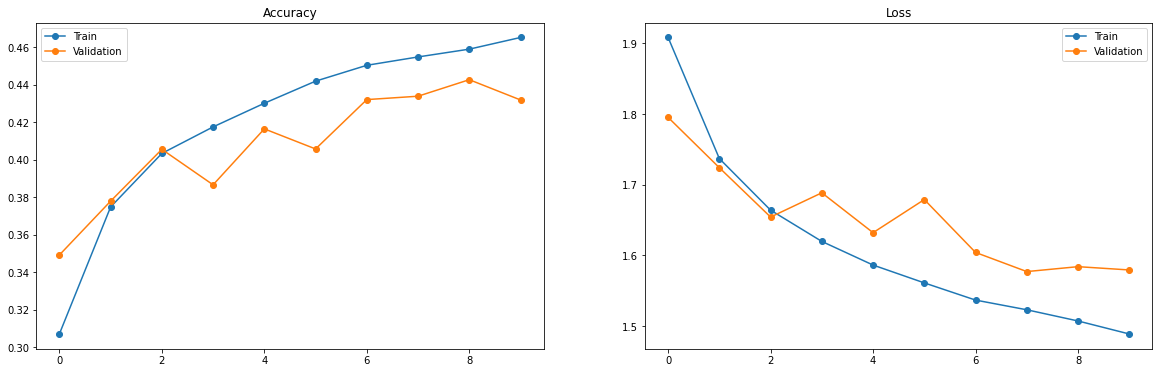

In [14]:
#print(h.keys())
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')
plt.legend(['Train', 'Validation'])
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '-o')
plt.plot(h.history['val_loss'], '-o')
plt.legend(['Train', 'Validation'])
plt.title('Loss')
plt.show()

In [3]:
accuracy = []

for k in range(1, 101):
  print("k: ", k)
  acc = []
  for f in range(5):
    #divide data into folds
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    cm = ce = 0       
  #c for correct, m for manhattan, e for euclidean

    for i in range(len(validationX)):
      man_distance = []
      euc_distance = []

      for j in range(len(trainX)):
       
  #manhattan & euclidean calculating distance between two images l1,l2
  
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

       
        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        man_distance.append([l1, trainY[j][0]])
        euc_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      man_distance = np.array(man_distance)
      man_distance = man_distance[man_distance[:, 0].argsort()]
      euc_distance = np.array(euc_distance)
      euc_distance = euc_distance[euc_distance[:, 0].argsort()]
      
s       values = man_distance[:k, 1]
      # print value
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        cm += 1
      values = euc_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        ce += 1


      if i == 100:
        break

  acc.append([cm/100, ce/100])
  accuracy.append([acc, k])

print(accuracy)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30
k:  31
k:  32
k:  33
k:  34
k:  35
k:  36
k:  37
k:  38
k:  39
k:  40
k:  41
k:  42
k:  43
k:  44
k:  45
k:  46
k:  47
k:  48
k:  49
k:  50
k:  51
k:  52
k:  53
k:  54
k:  55
k:  56
k:  57
k:  58
k:  59
k:  60
k:  61
k:  62
k:  63
k:  64
k:  65
k:  66
k:  67
k:  68
k:  69
k:  70
k:  71
k:  72
k:  73
k:  74
k:  75
k:  76
k:  77
k:  78
k:  79
k:  80
k:  81
k:  82
k:  83
k:  84
k:  85
k:  86
k:  87
k:  88
k:  89
k:  90
k:  91
k:  92
k:  93
k:  94
k:  95
k:  96
k:  97
k:  98
k:  99
k:  100
[[[[0.16, 0.15], [0.24, 0.17], [0.16, 0.11], [0.21, 0.19], [0.1, 0.13]], 1], [[[0.16, 0.1], [0.18, 0.2], [0.16, 0.12], [0.16, 0.16], [0.14, 0.13]], 2], [[[0.24, 0.1], [0.23, 0.15], [0.13, 0.15], [0.16, 0.11], [0.12, 0.15]], 3], [[[0.16, 0.14], [0.26, 0.24], [0.14, 0.14], [0.12, 0.2], [0.14, 0.17]], 4], [[[0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


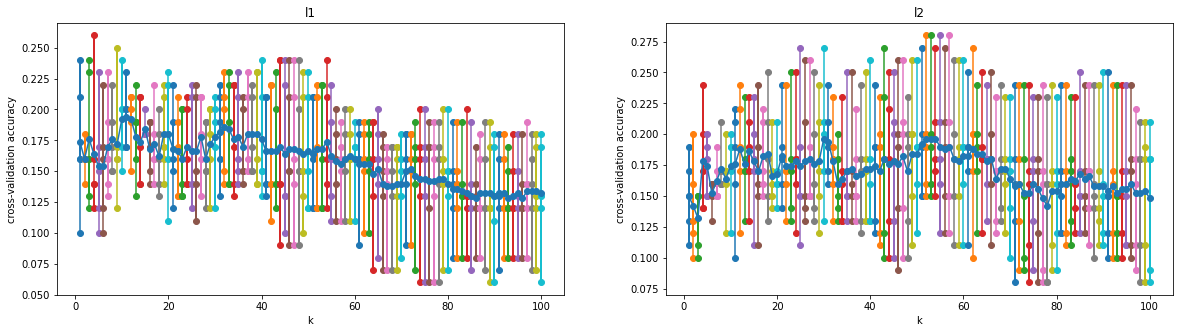

In [15]:
#Cross Validation graph
avg1 = []
avg2 = []
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('l1')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l1 = np.array(accuracy[i][0])[:,0]
  avg1.append(np.average(l1))
  plt.plot(a, l1, 'o-')
  
plt.plot(k, avg1, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')


plt.subplot(1,2,2)
plt.title('l2')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accuracy[i][0])[:,1]
  avg2.append(np.average(l2))
  plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')

plt.show()